In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim

from itertools import product

# Always make it pretty.
plt.style.use('ggplot')

import samplers as spl

## The Central Limit Theorem

The central limit theorem (CLT) allows us to make probabilistic statements about the sample mean from any population using the normal distribution.

Why do we care?

> Our general interest is in the **population**, the **sample** is just the lens we get to view it through.

Often we are concerned with finding the mean of a population. The CLT let's us do that.

### The Distribution of the Sample Means

Let's return to the distribution of a very popular statistic, the **distribution of the sample means**.

Consider a fixed population, and for the moment, suppose we have the power to sample freely, as many data points as we wish.

Here, we use an exponential population, which has a considerable right skew.

In [2]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

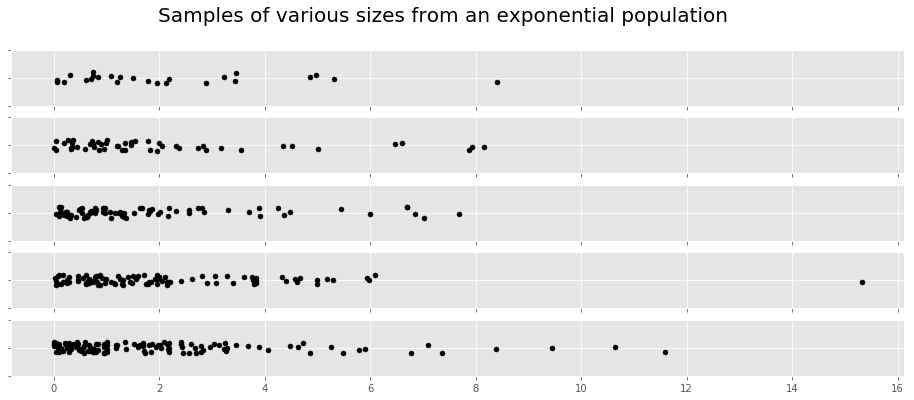

In [3]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

population = spl.Exponential(2)
sample_sizes = [25, 50, 75, 100, 125]
for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.sample(sample_size)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples of various sizes from an exponential population", fontsize=20)

### Suppose we fix a sample size, and repeatedly sample from the population with that fixed size

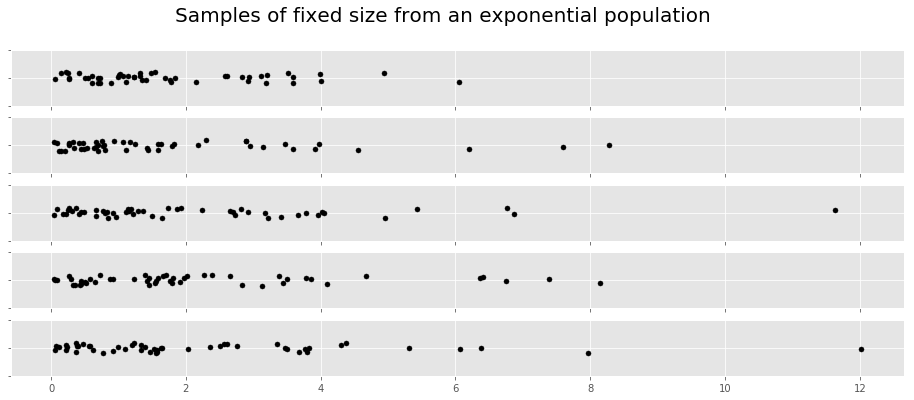

In [4]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.sample(50)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    
_ = fig.suptitle("Samples of fixed size from an exponential population", fontsize=20)

Remember, the **sampling distribution of the mean** is the distribution of the means computed from these *different samples*.

Here, we've superimposed the sample means on each of our sample means.

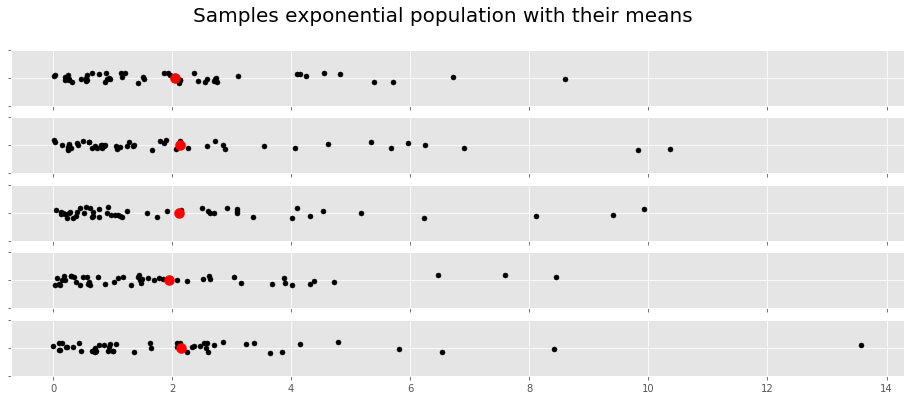

In [5]:
fig, axs = plt.subplots(5, figsize=(16, 6), sharex=True)

for sample_size, ax in zip(sample_sizes, axs.flatten()):
    sample = population.sample(50)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax.scatter(sample.mean(), 0, color='red', s=100)
    
_ = fig.suptitle("Samples exponential population with their means", 
                 fontsize=20)

Let's do that, let's repeatedly sample, compute the means of the samples, then plot the distribution of these means.

Each of the red dots in the above visualization is counted **one time** in the histogram below.

In [8]:
def smfp(n_samples, n_summands, sampler): 
    return (1.0/n_summands) * spl.sample_from_repeated_sum(n_samples, n_summands, sampler)

/Users/alicakey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


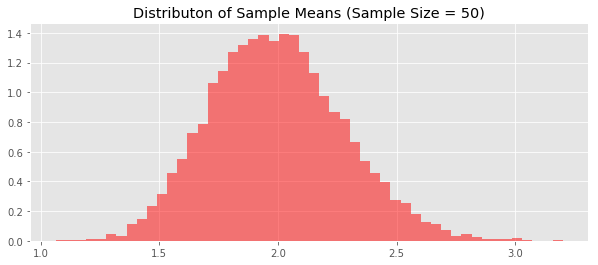

In [9]:
sample_means = smfp(n_samples=10000, n_summands=50, sampler=population)

fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(sample_means, bins=50, normed=True, color="red", alpha=0.5)
_ = ax.set_title("Distributon of Sample Means (Sample Size = 50)")

The averaging has greatly reduced the rightward skew of our original distribution. Our process has smothed out and symmetricized the original distribution.

Let's overlay a normal distribution with the correct mean and variance.

/Users/alicakey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


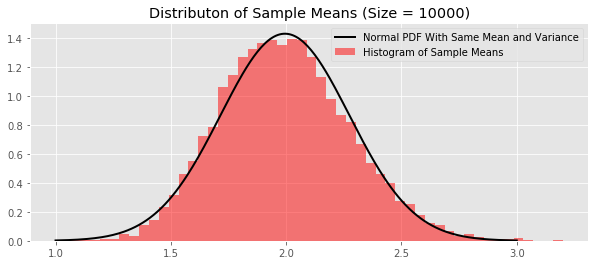

In [10]:
mean_sample_means = np.mean(sample_means)
variance_sample_means = np.var(sample_means)
sample_means_model = spl.Normal(mean_sample_means, 
                                np.sqrt(variance_sample_means))

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(sample_means, bins=50, normed=True, color="red", alpha=0.5,
            label="Histogram of Sample Means")
x = np.linspace(1, 3, num=250)
ax.plot(x, sample_means_model.pdf(x), linewidth=2, color="black", 
        label="Normal PDF With Same Mean and Variance")
ax.set_title("Distributon of Sample Means (Size = 10000)")
ax.legend()

## The Central Limit Theorem

The **central limit theorem** asserts that as we take the mean of larger and larger samples, the distribution of sample means becomes more and more normal.

Said differently, probabilistic statements about the mean of a large sample can be well approximated by assuming that the distribution of the sample means is a normal distribution with the correct mean and variance.

/Users/alicakey/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


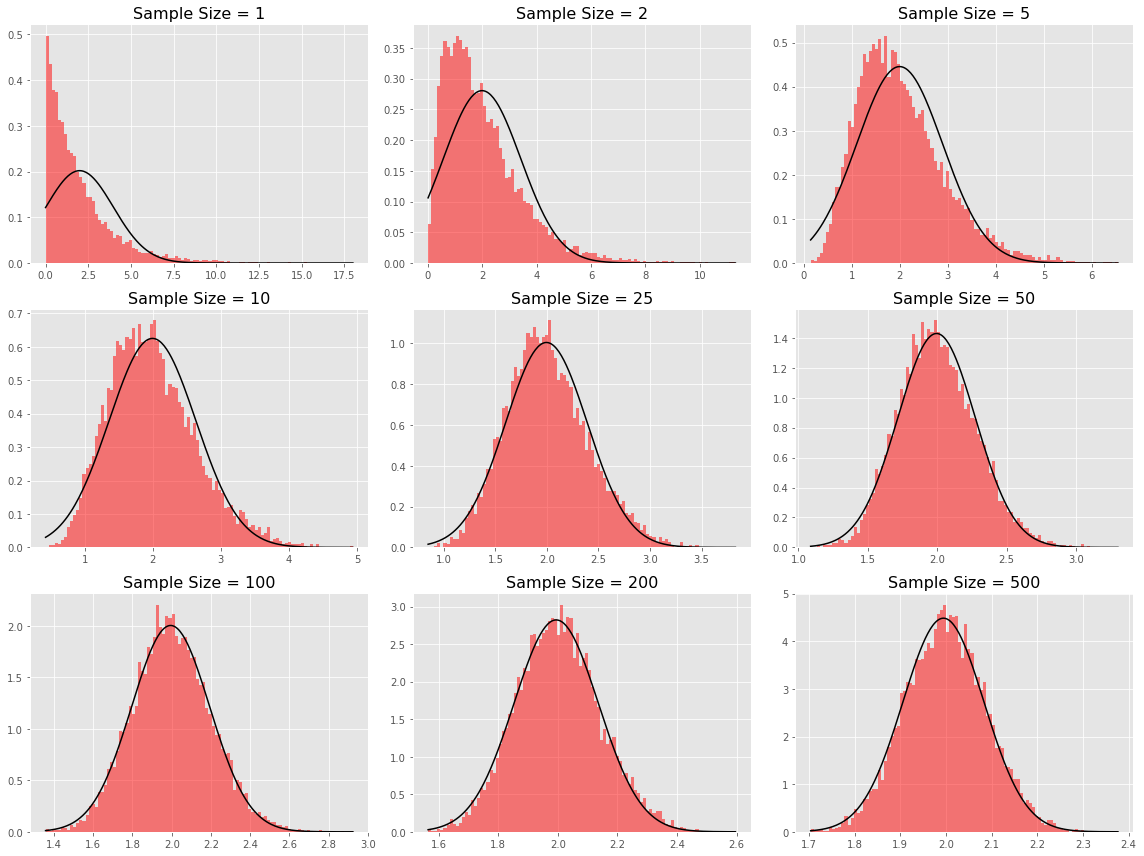

In [11]:
size_of_sample = [1, 2, 5, 10, 25, 50, 100, 200, 500]

fig, axs = plt.subplots(3, 3, figsize=(16, 12))

for sample_size, ax in zip(size_of_sample, axs.flatten()):
    sample_means = spl.sample_means_from_population(
        n_samples=10000, n_summands=sample_size, sampler=population)
    variance_sample_means = np.var(sample_means)
    sample_means_model = spl.Normal(mean_sample_means, 
                                    np.sqrt(variance_sample_means))
    ax.hist(sample_means, bins=100, normed=True, color="red", alpha=0.5)
    t = np.linspace(min(sample_means), max(sample_means), num=250)
    ax.plot(t, sample_means_model.pdf(t), color="black")
    _ = ax.set_title("Sample Size = {}".format(sample_size), fontsize=16)
fig.tight_layout()

## Summary

The stunning part of the central limit theorem is that it makes almost no assumptions about the underlying population. It can be anything, and it's sample means will always tend to be normal.
  
The central limit theorem is a **miracle**, pure and simple.  There is no real *reason* it is true, it just is.  Consider it a gift of rare order in the universe, more like a fundamental law of physics than an intuitive mathematical fact.

Here's an elevator pitch statement of the central limit theorem, good for job interviews: **The central limit theorem allows us to make probabilistic statements about the sample mean from any population using the normal distribution.**